<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: Mariya Mansurova, Analyst & developer in Yandex.Metrics team. Translated by Ivan Zakharov, ML enthusiast. <br>This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Assignment #9 (demo). Solution
## <center> Time series analysis

**Same assignment as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/a9-demo-time-series-analysis) + [solution](https://www.kaggle.com/kashnitsky/a9-demo-time-series-analysis-solution).**

**Fill cells marked with "Your code here" and submit your answers to the questions through the [web form](https://docs.google.com/forms/d/1UYQ_WYSpsV3VSlZAzhSN_YXmyjV7YlTP8EYMg8M8SoM/edit).**

In [1]:
import warnings

#warnings.filterwarnings("ignore")
import os

import numpy as np
import pandas as pd
import requests
from plotly import __version__
from plotly import graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

init_notebook_mode(connected=True)

In [2]:
# helper function
def plotly_df(df, title=""):
    data = []

    for column in df.columns:
        trace = go.Scatter(x=df.index, y=df[column], mode="lines", name=column)
        data.append(trace)

    layout = dict(title=title)
    fig = dict(data=data, layout=layout)
    iplot(fig, show_link=False)

## Data preparation

In [3]:
df = pd.read_csv("../../data/wiki_machine_learning.csv", sep=" ")
df = df[df["count"] != 0]
df.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [4]:
df.shape

(383, 7)

## Predicting with FB Prophet
We will train at first 5 months and predict the number of trips for June.

In [5]:
df.date = pd.to_datetime(df.date)

In [6]:
plotly_df(df.set_index("date")[["count"]])

In [7]:
from prophet import Prophet

In [8]:
predictions = 30

df = df[["date", "count"]]
df.columns = ["ds", "y"]
df.tail()

,ds,y
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389
372,2016-01-20,3559


In [9]:
train_df = df[:-predictions].copy()

In [10]:
m = Prophet()
m.fit(train_df);

10:11:35 - cmdstanpy - INFO - Chain [1] start processing
10:11:35 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future = m.make_future_dataframe(periods=predictions)
future.tail()

,ds
378,2016-01-16
379,2016-01-17
380,2016-01-18
381,2016-01-19
382,2016-01-20


In [12]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
378,2016-01-16,2974.809126,1742.510288,2518.872503,2955.139111,2994.942876,-861.974711,-861.974711,-861.974711,-861.974711,-861.974711,-861.974711,0.0,0.0,0.0,2112.834415
379,2016-01-17,2980.146716,1849.304894,2681.850698,2959.065238,3001.392899,-720.945291,-720.945291,-720.945291,-720.945291,-720.945291,-720.945291,0.0,0.0,0.0,2259.201424
380,2016-01-18,2985.484306,2826.070473,3670.191363,2962.772068,3007.558620,281.432297,281.432297,281.432297,281.432297,281.432297,281.432297,0.0,0.0,0.0,3266.916602
381,2016-01-19,2990.821895,3119.145735,3965.487455,2966.891113,3014.276310,541.623035,541.623035,541.623035,541.623035,541.623035,541.623035,0.0,0.0,0.0,3532.444930
382,2016-01-20,2996.159485,3017.350227,3849.095156,2971.150537,3020.850958,425.717294,425.717294,425.717294,425.717294,425.717294,425.717294,0.0,0.0,0.0,3421.876780


**<font color='red'>Question 1:</font>** What is the prediction of the number of views of the wiki page on January 20? Round to the nearest integer.

- 4947
- 3426 **[+]**
- 5229
- 2744

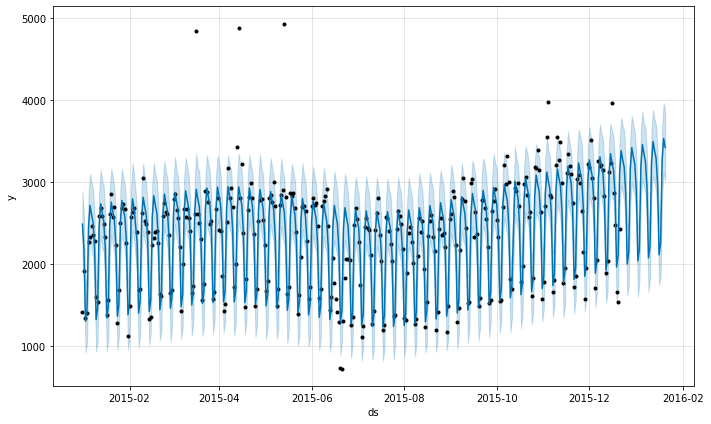

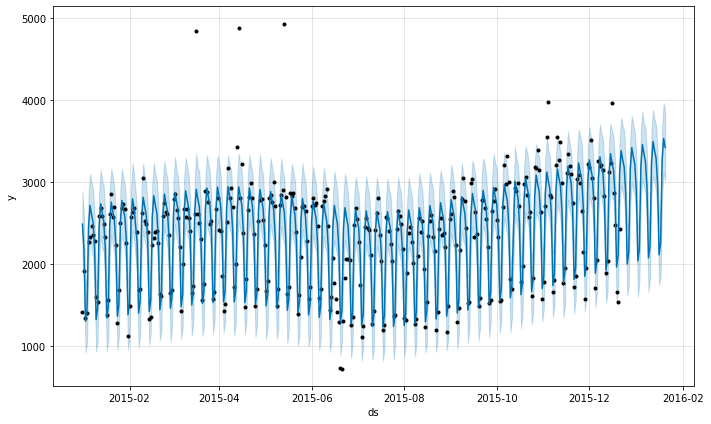

In [13]:
m.plot(forecast)

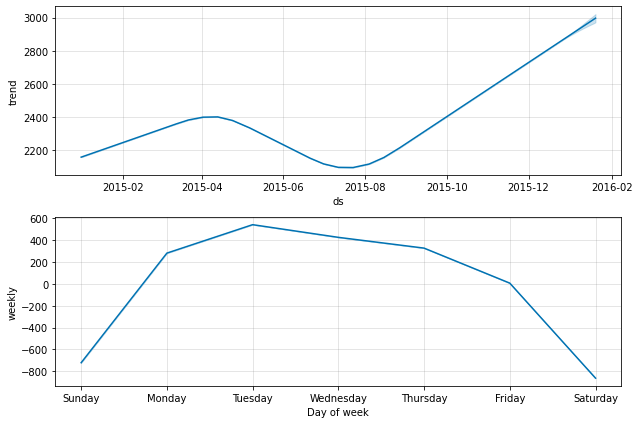

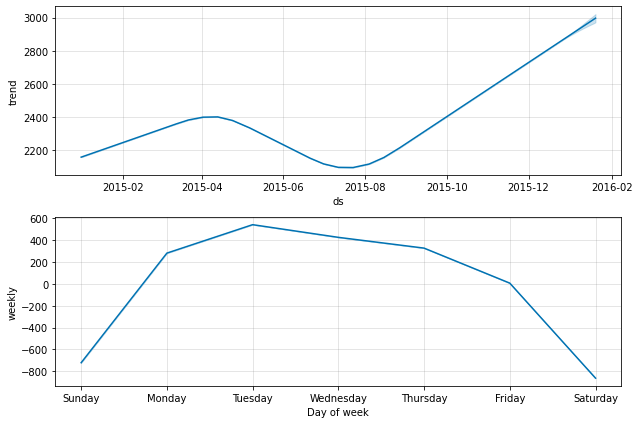

In [14]:
m.plot_components(forecast)

In [15]:
cmp_df = forecast.set_index("ds")[["yhat", "yhat_lower", "yhat_upper"]].join(
    df.set_index("ds")
)

In [16]:
cmp_df["e"] = cmp_df["y"] - cmp_df["yhat"]
cmp_df["p"] = 100 * cmp_df["e"] / cmp_df["y"]
print("MAPE = ", round(np.mean(abs(cmp_df[-predictions:]["p"])), 2))
print("MAE = ", round(np.mean(abs(cmp_df[-predictions:]["e"])), 2))

MAPE =  34.34
MAE =  596.38


Estimate the quality of the prediction with the last 30 points.

**<font color='red'>Question 2:</font> What is MAPE equal to?**

- 34.5 **[+]**
- 42.42
- 5.39
- 65.91

**<font color='red'>Question 3:</font> What is MAE equal to?**

- 355
- 4007
- 600 **[+]**
- 903

## Predicting with ARIMA

In [17]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

plt.rcParams["figure.figsize"] = (15, 10)

**<font color='red'>Question 4:</font> Let's verify the stationarity of the series using the Dickey-Fuller test. Is the series stationary? What is the p-value?**

- Series is stationary, p_value = 0.107
- Series is not stationary, p_value = 0.107 **[+]**
- Series is stationary, p_value = 0.001
- Series is not stationary, p_value = 0.001

Dickey-Fuller test: p=0.107392


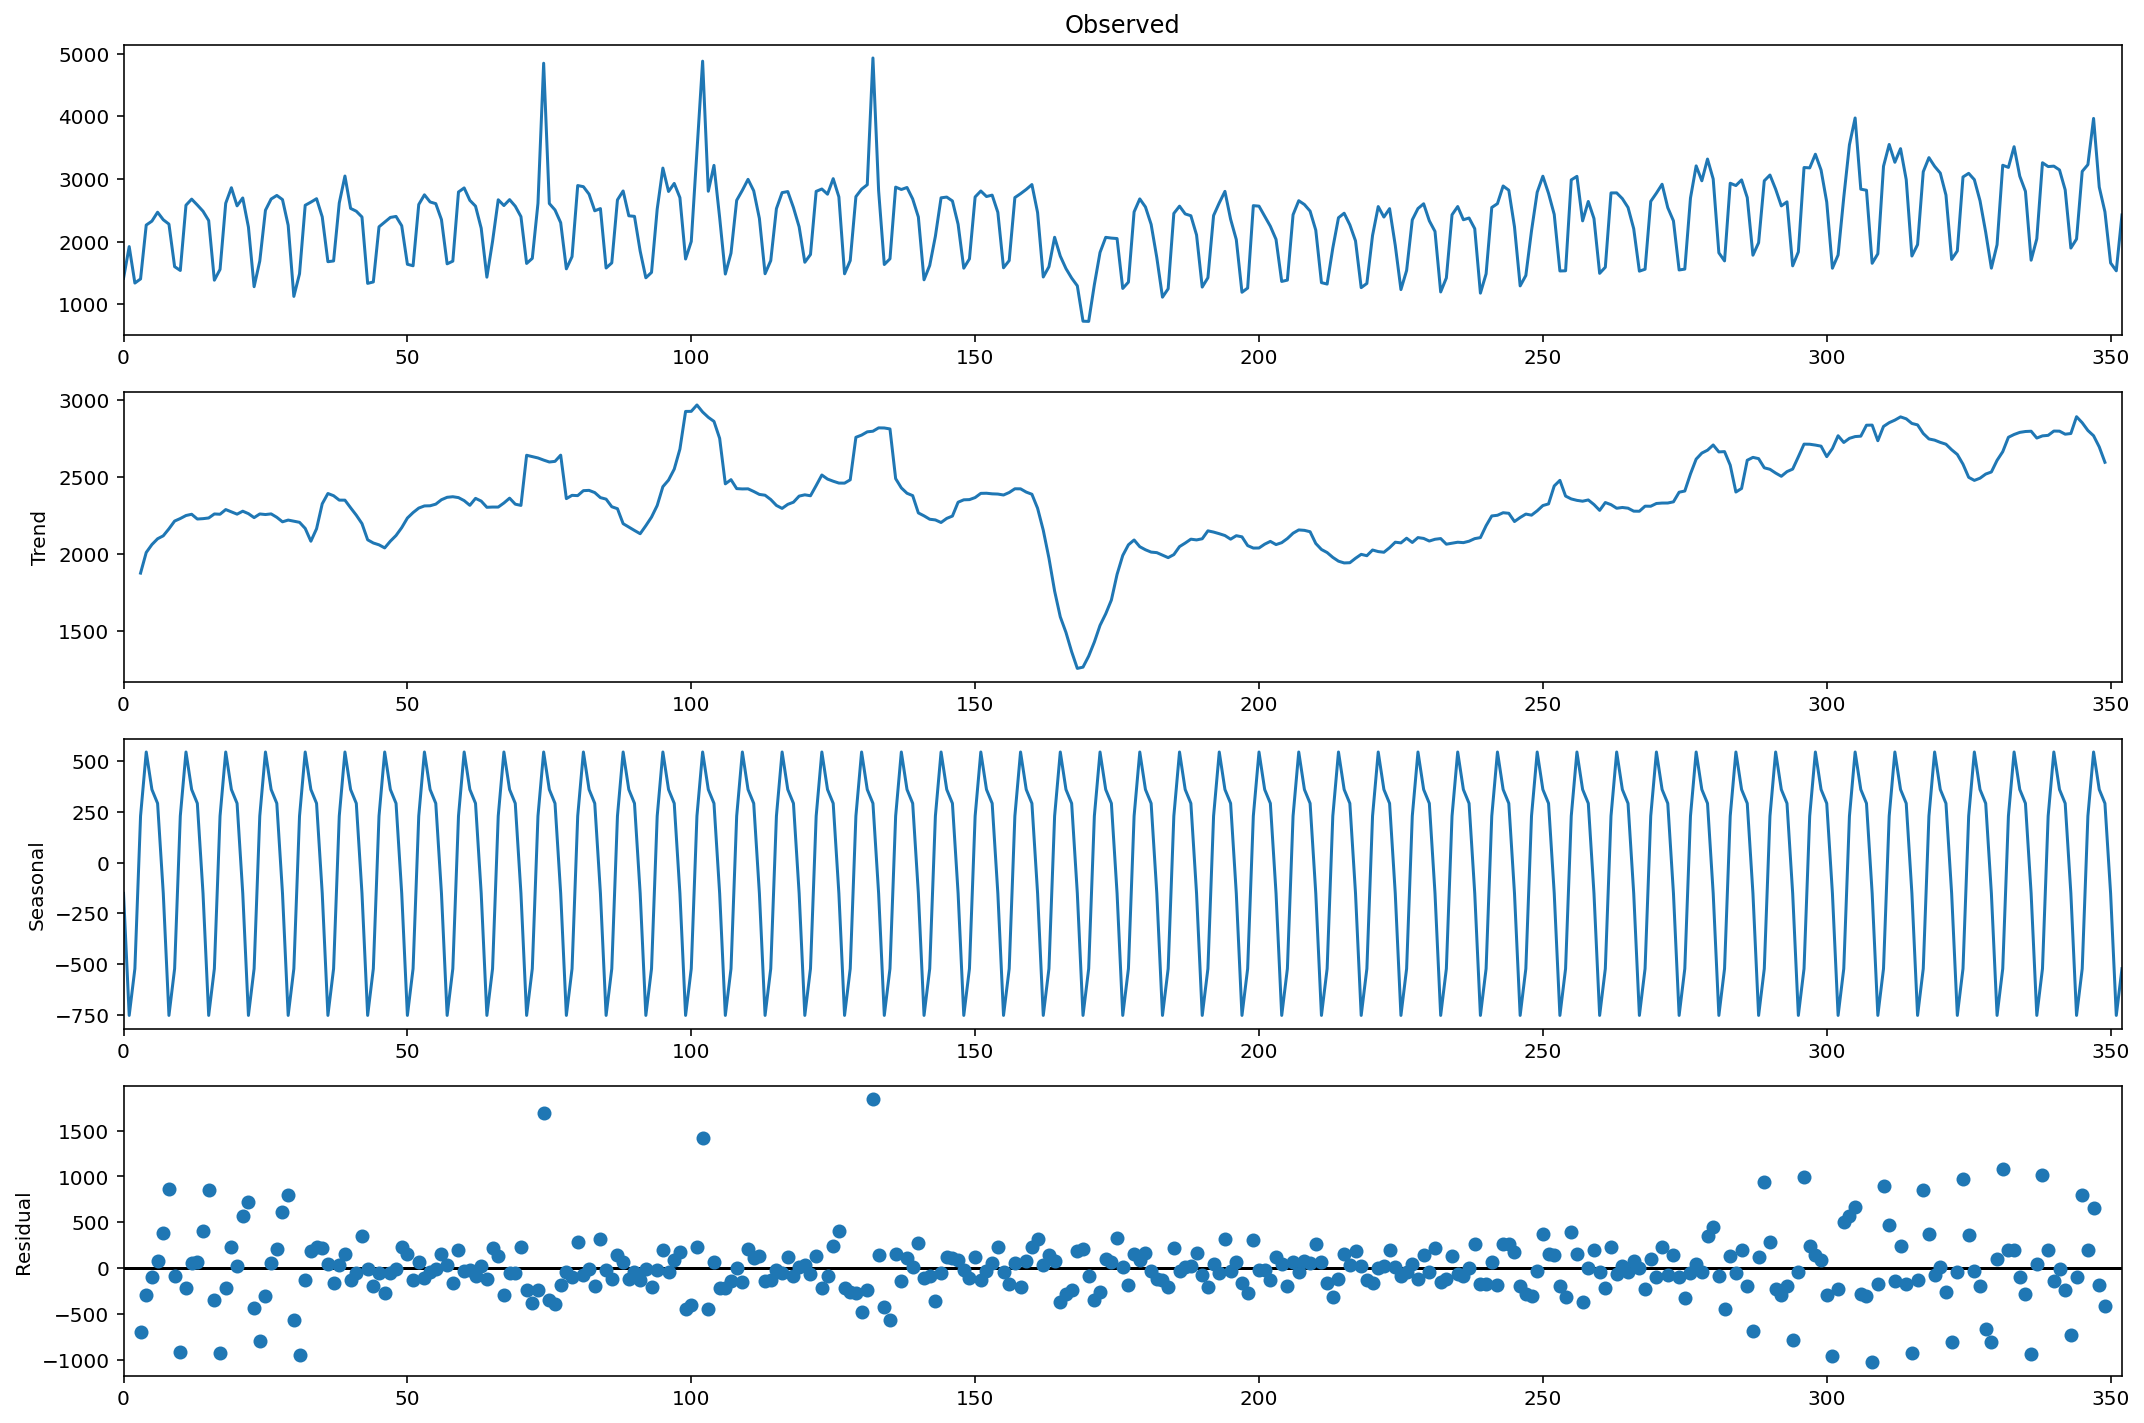

In [18]:
sm.tsa.seasonal_decompose(train_df["y"].values, period=7).plot()
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(train_df["y"])[1])

But the seasonally differentiated series will already be stationary.

In [19]:
train_df.set_index("ds", inplace=True)
train_df.index = pd.DatetimeIndex(train_df.index).to_period('d')

Dickey-Fuller test: p=0.000000


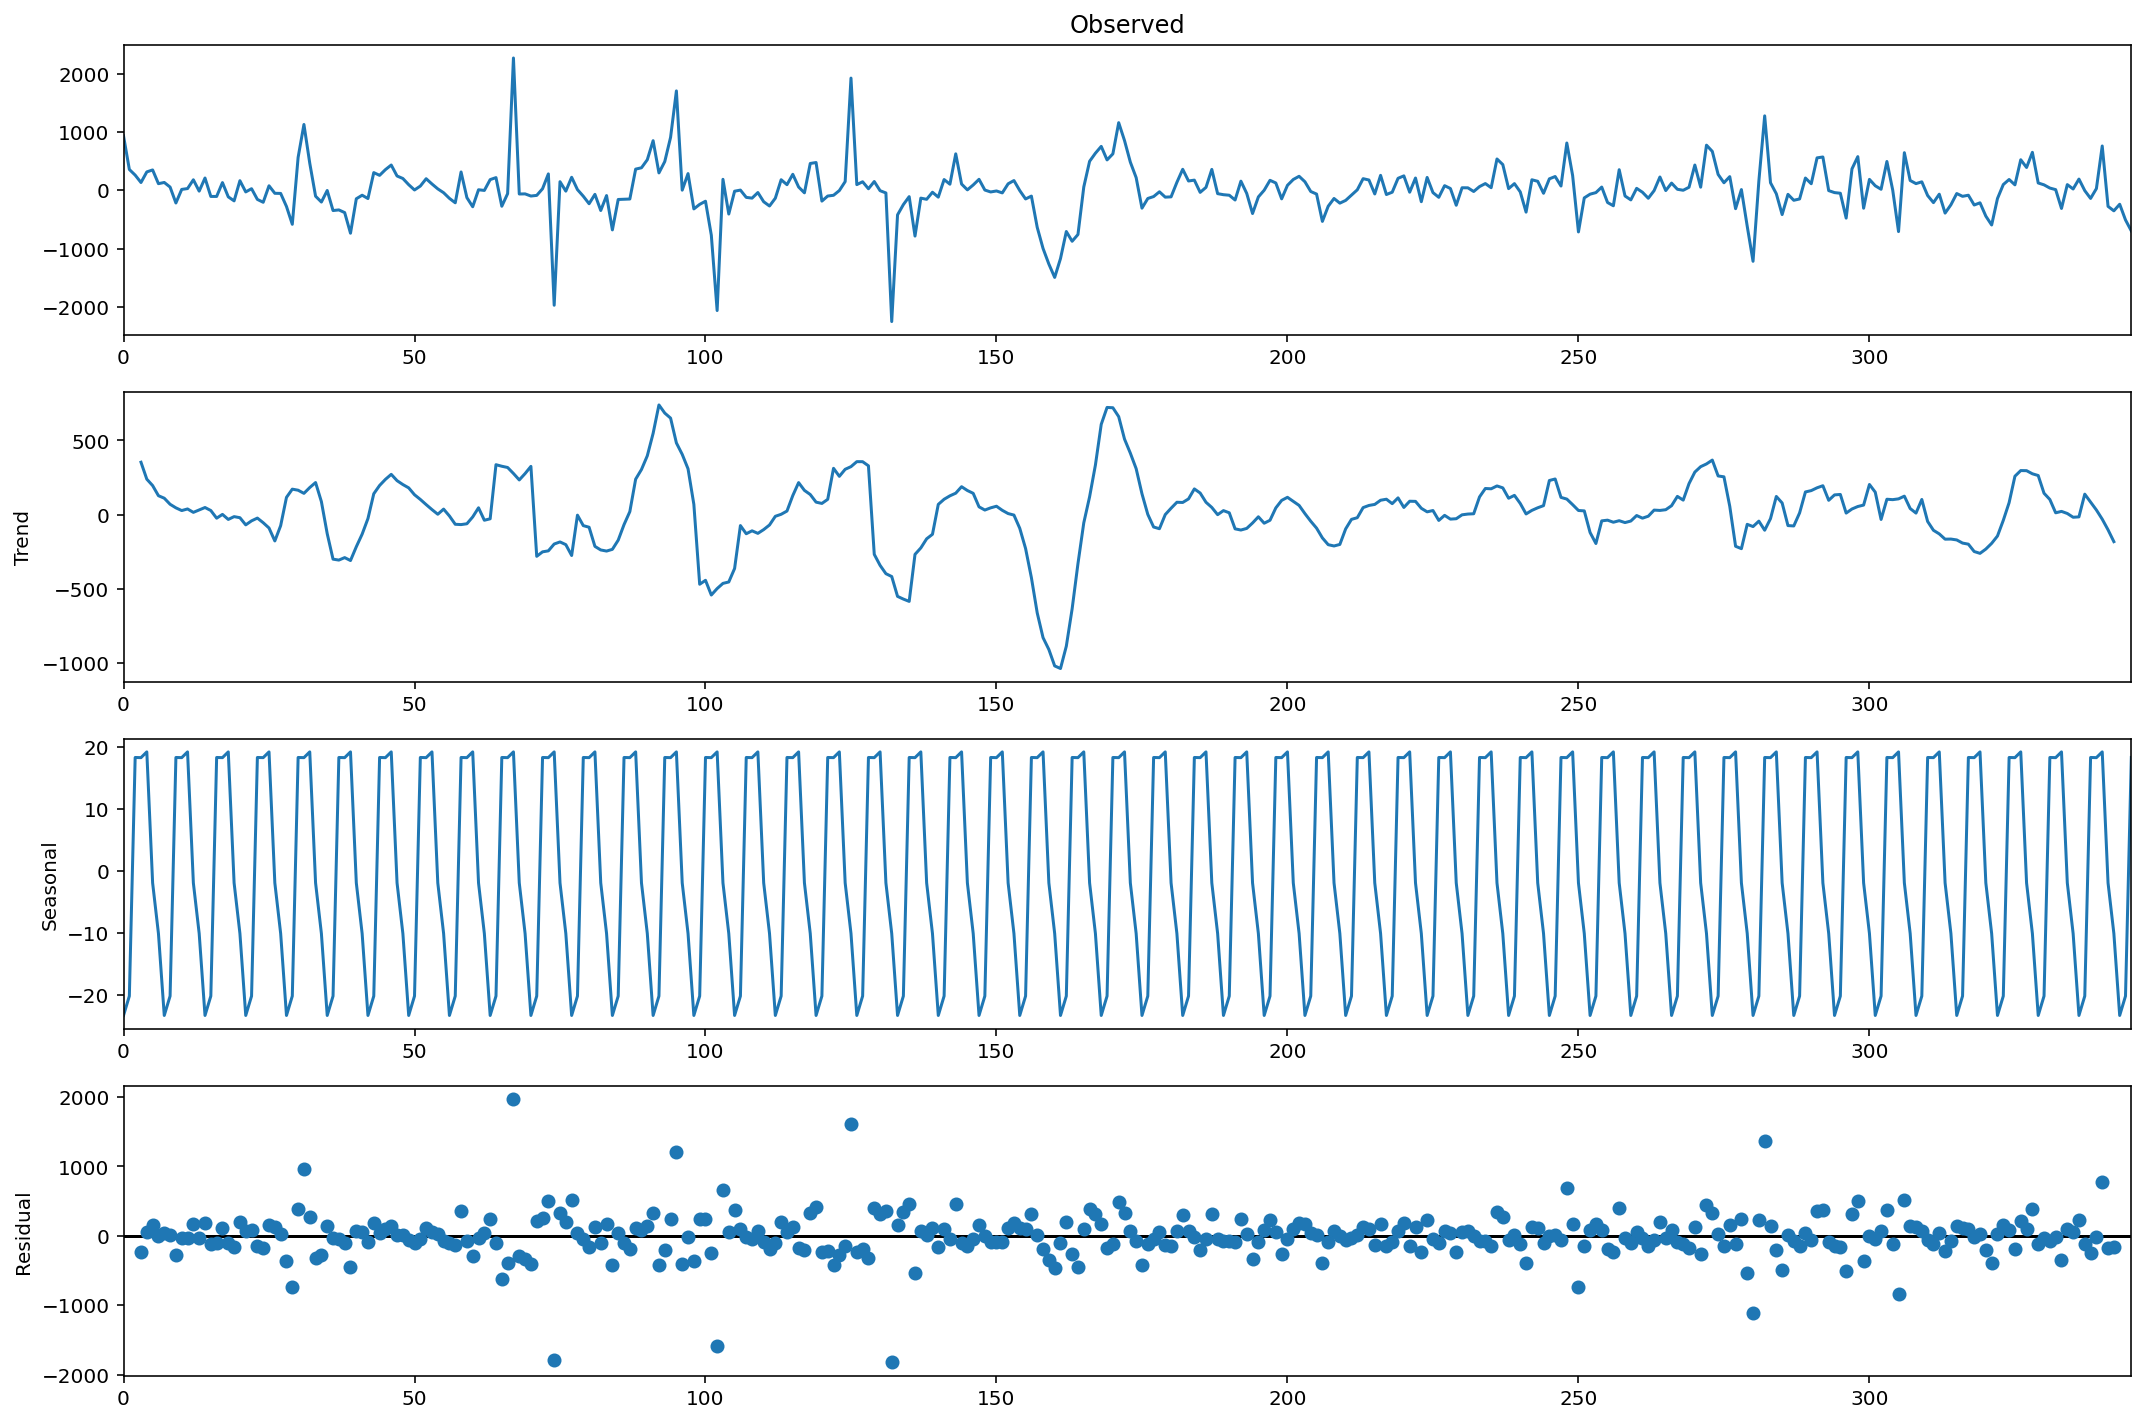

In [20]:
train_df["y_diff"] = train_df.y - train_df.y.shift(7)
sm.tsa.seasonal_decompose(train_df.y_diff[7:].values, period=7).plot()
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(train_df.y_diff[8:])[1])

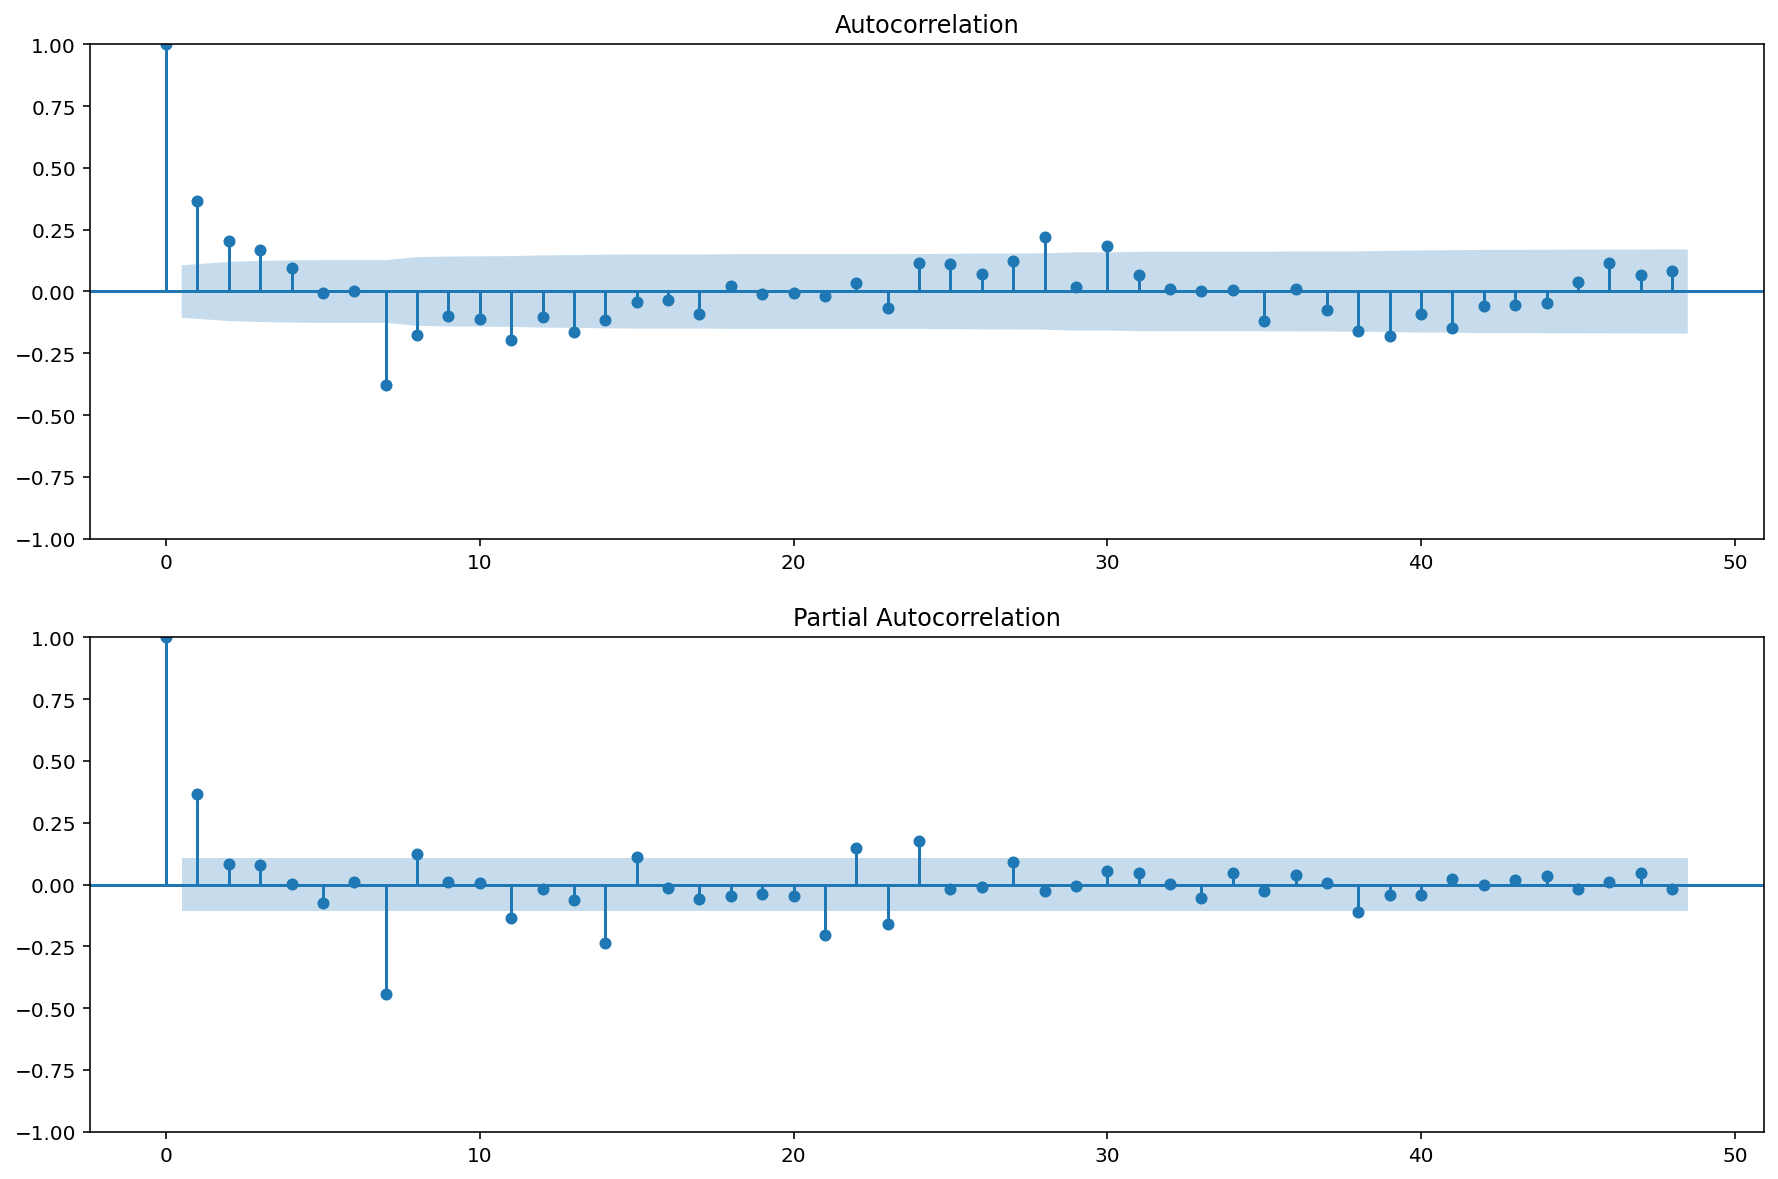

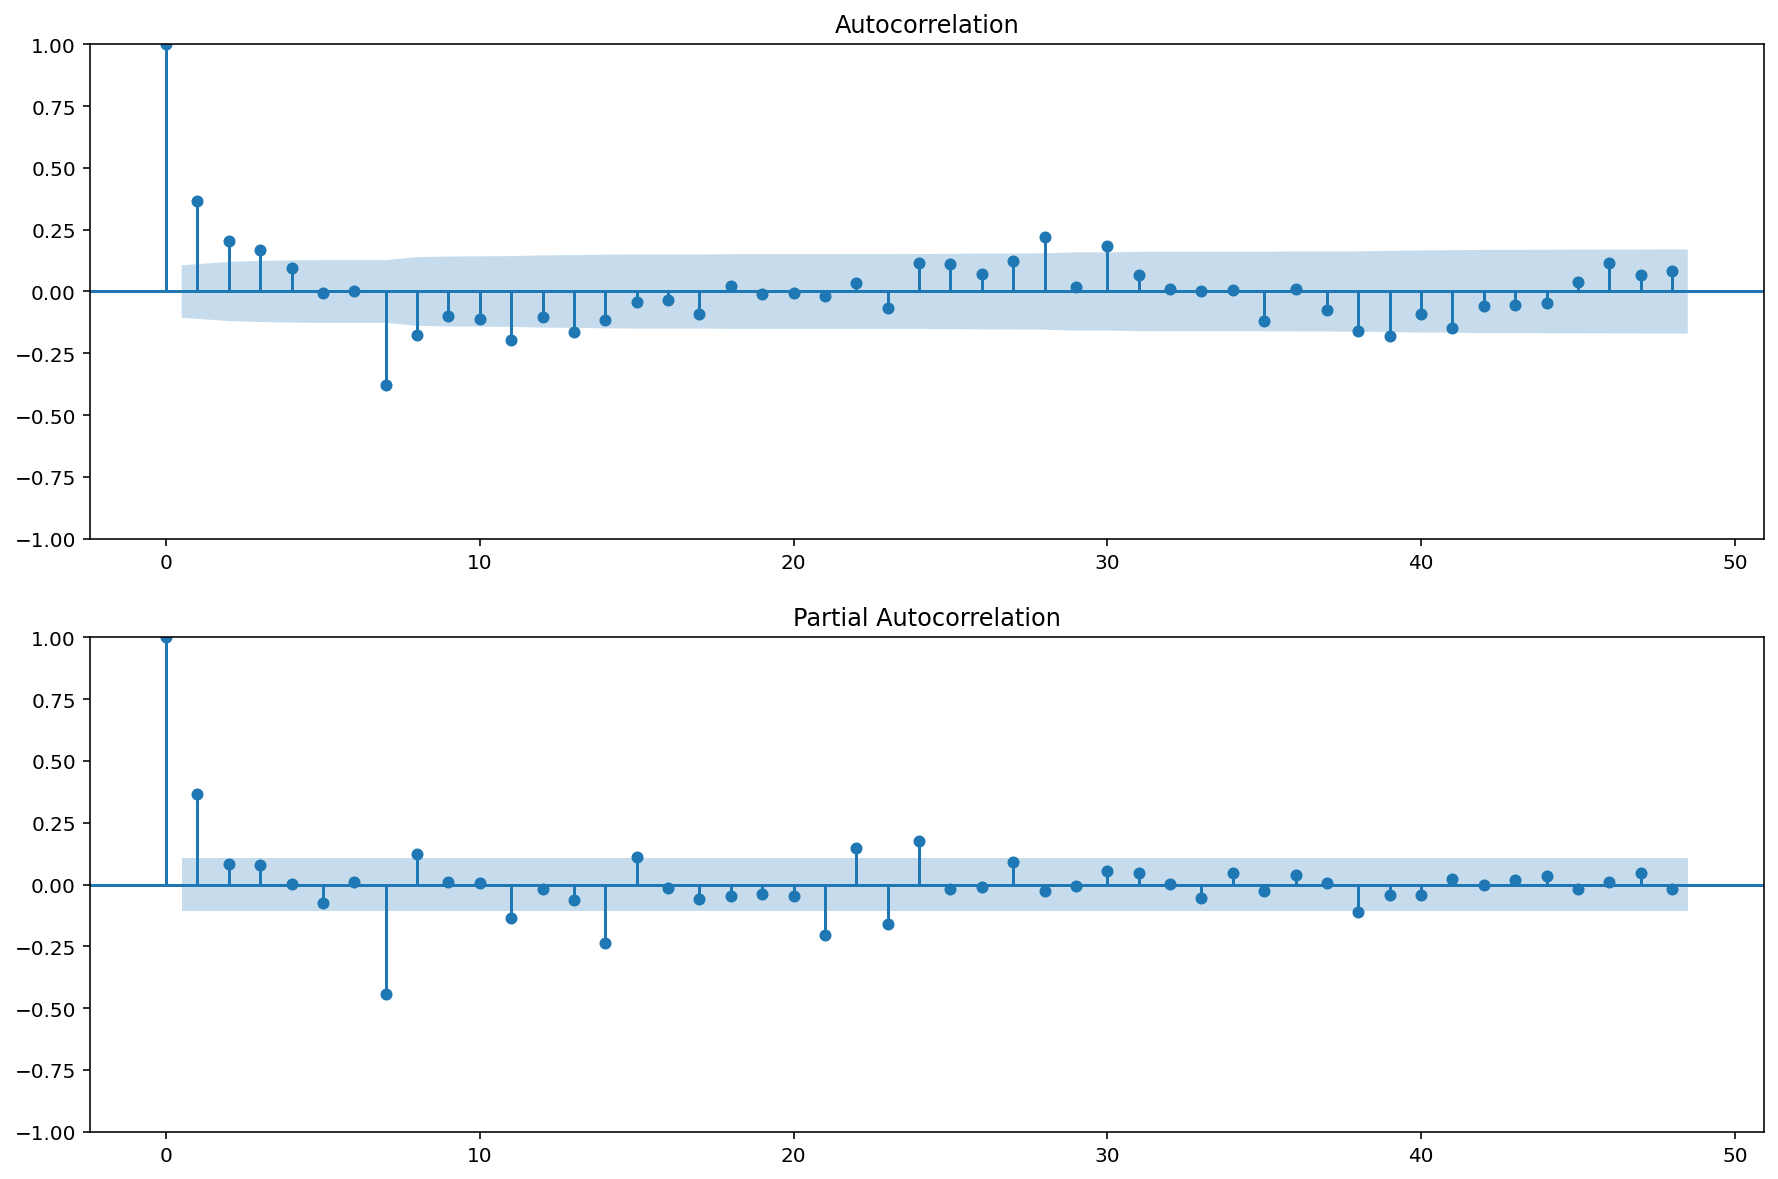

In [21]:
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(train_df.y_diff[13:].values.squeeze(), lags=48, ax=ax)

ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(train_df.y_diff[13:].values.squeeze(), lags=48, ax=ax, method='ywm')

Initial values:
* Q = 1
* q = 3
* P = 3
* p = 1

In [22]:
ps = range(0, 2)
ds = range(0, 2)
qs = range(0, 4)
Ps = range(0, 4)
Ds = range(0, 3)
Qs = range(0, 2)

In [23]:
from itertools import product

parameters = product(ps, ds, qs, Ps, Ds, Qs)
parameters_list = list(parameters)
len(parameters_list)

384

In [24]:
%%time
import warnings

from tqdm import tqdm

results1 = []
best_aic = float("inf")
warnings.filterwarnings("ignore")

for param in tqdm(parameters_list):
    # the try-except block is necessary, because on some sets of parameters the model can not be trained
    try:
        model = sm.tsa.statespace.SARIMAX(
            train_df["y"],
            order=(param[0], param[1], param[2]),
            seasonal_order=(param[3], param[4], param[5], 7),
            # train the model as is even if that would lead to a non-stationary / non-invertible model
            enforce_stationary=False,    # see https://github.com/statsmodels/statsmodels/issues/6225
            enforce_invertibility=False  # for details
        ).fit(disp=-1)
    
    except (ValueError, np.linalg.LinAlgError):
        continue
    
    aic = model.aic
    # save the best model, aic, parameters
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results1.append([param, model.aic])
    

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 384/384 [05:05<00:00,  1.26it/s]

CPU times: user 25min 3s, sys: 4min 48s, total: 29min 51s
Wall time: 5min 5s


In [25]:
result_table1 = pd.DataFrame(results1)
result_table1.columns = ["parameters", "aic"]
print(result_table1.sort_values(by="aic", ascending=True).head())

             parameters          aic
381  (1, 1, 3, 3, 2, 0)    16.000000
126  (0, 1, 1, 1, 0, 1)  2924.412028
67   (0, 0, 2, 3, 0, 1)  4892.181867
382  (1, 1, 3, 3, 2, 1)  4961.013283
166  (0, 1, 2, 3, 2, 1)  4961.642268


If we consider the variants proposed in the form:

In [26]:
result_table1[
    result_table1["parameters"].isin(
        [(1, 0, 2, 3, 1, 0), (1, 1, 2, 3, 2, 1), (1, 1, 2, 3, 1, 1), (1, 0, 2, 3, 0, 0)]
    )
].sort_values(by="aic")

,parameters,aic
358,"(1, 1, 2, 3, 2, 1)",4990.590717
259,"(1, 0, 2, 3, 1, 0)",5022.312524
356,"(1, 1, 2, 3, 1, 1)",5023.834720
257,"(1, 0, 2, 3, 0, 0)",5168.209731


Now do the same, but for the series with Box-Cox transformation.

In [27]:
import scipy.stats

train_df["y_box"], lmbda = scipy.stats.boxcox(train_df["y"])
print("The optimal Box-Cox transformation parameter: %f" % lmbda)

The optimal Box-Cox transformation parameter: 0.732841


In [28]:
results2 = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    # the try-except block is necessary, because on some sets of parameters the model can not be trained
    try:
        model = sm.tsa.statespace.SARIMAX(
            train_df["y_box"],
            order=(param[0], param[1], param[2]),
            seasonal_order=(param[3], param[4], param[5], 7),
            # train the model as is even if that would lead to a non-stationary / non-invertible model
            enforce_stationary=False,    # see https://github.com/statsmodels/statsmodels/issues/6225
            enforce_invertibility=False  # for details
        ).fit(disp=-1)
        
    except (ValueError, np.linalg.LinAlgError):
        continue
        
    aic = model.aic
    # save the best model, aic, parameters
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results2.append([param, model.aic])
    

#warnings.filterwarnings("default")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 384/384 [06:41<00:00,  1.05s/it]


In [29]:
result_table2 = pd.DataFrame(results2)
result_table2.columns = ["parameters", "aic"]
print(result_table2.sort_values(by="aic").head())

             parameters          aic
37   (0, 0, 1, 2, 0, 1)    10.000000
363  (1, 1, 3, 1, 0, 1)   559.829019
259  (1, 0, 2, 3, 2, 1)  3528.503404
283  (1, 0, 3, 3, 2, 1)  3529.820329
212  (1, 0, 0, 3, 2, 1)  3530.231534


If we consider the variants proposed in the form:

In [30]:
result_table2[
    result_table2["parameters"].isin(
        [(1, 0, 2, 3, 1, 0), (1, 1, 2, 3, 2, 1), (1, 1, 2, 3, 1, 1), (1, 0, 2, 3, 0, 0)]
    )
].sort_values(by="aic")

,parameters,aic
355,"(1, 1, 2, 3, 2, 1)",3544.800945
256,"(1, 0, 2, 3, 1, 0)",3556.880030
353,"(1, 1, 2, 3, 1, 1)",3558.021174
255,"(1, 0, 2, 3, 0, 0)",3674.914346


**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> <font color='red'>Question 5:</font> What parameters are the best for the model according to the `AIC` criterion?**

- D = 1, d = 0, Q = 0, q = 2, P = 3, p = 1
- D = 2, d = 1, Q = 1, q = 2, P = 3, p = 1 **[+]**
- D = 1, d = 1, Q = 1, q = 2, P = 3, p = 1
- D = 0, d = 0, Q = 0, q = 2, P = 3, p = 1

Let's look at the forecast of the best AIC model.

**Note:** any AIC below 3000 is suspicious, probably caused by non-convergence with MLE optimization, we'll pick the 3rd-best model in terms of AIC to visualize predictions.

In [31]:
best_model = sm.tsa.statespace.SARIMAX(
    train_df["y_box"],
    order=(1, 0, 2),
    seasonal_order=(3, 2, 1, 7),
    enforce_stationary=False,   
    enforce_invertibility=False  
).fit(disp=-1)

In [32]:
print(best_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               y_box   No. Observations:                  353
Model:             SARIMAX(1, 0, 2)x(3, 2, [1], 7)   Log Likelihood               -1756.252
Date:                             Fri, 07 Oct 2022   AIC                           3528.503
Time:                                     10:23:34   BIC                           3559.111
Sample:                                 01-01-2015   HQIC                          3540.701
                                      - 12-21-2015                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8331      0.111      7.519      0.000       0.616       1.050
ma.L1         -0.3500      

Student's test: p=0.121227
Dickey-Fuller test: p=0.000000


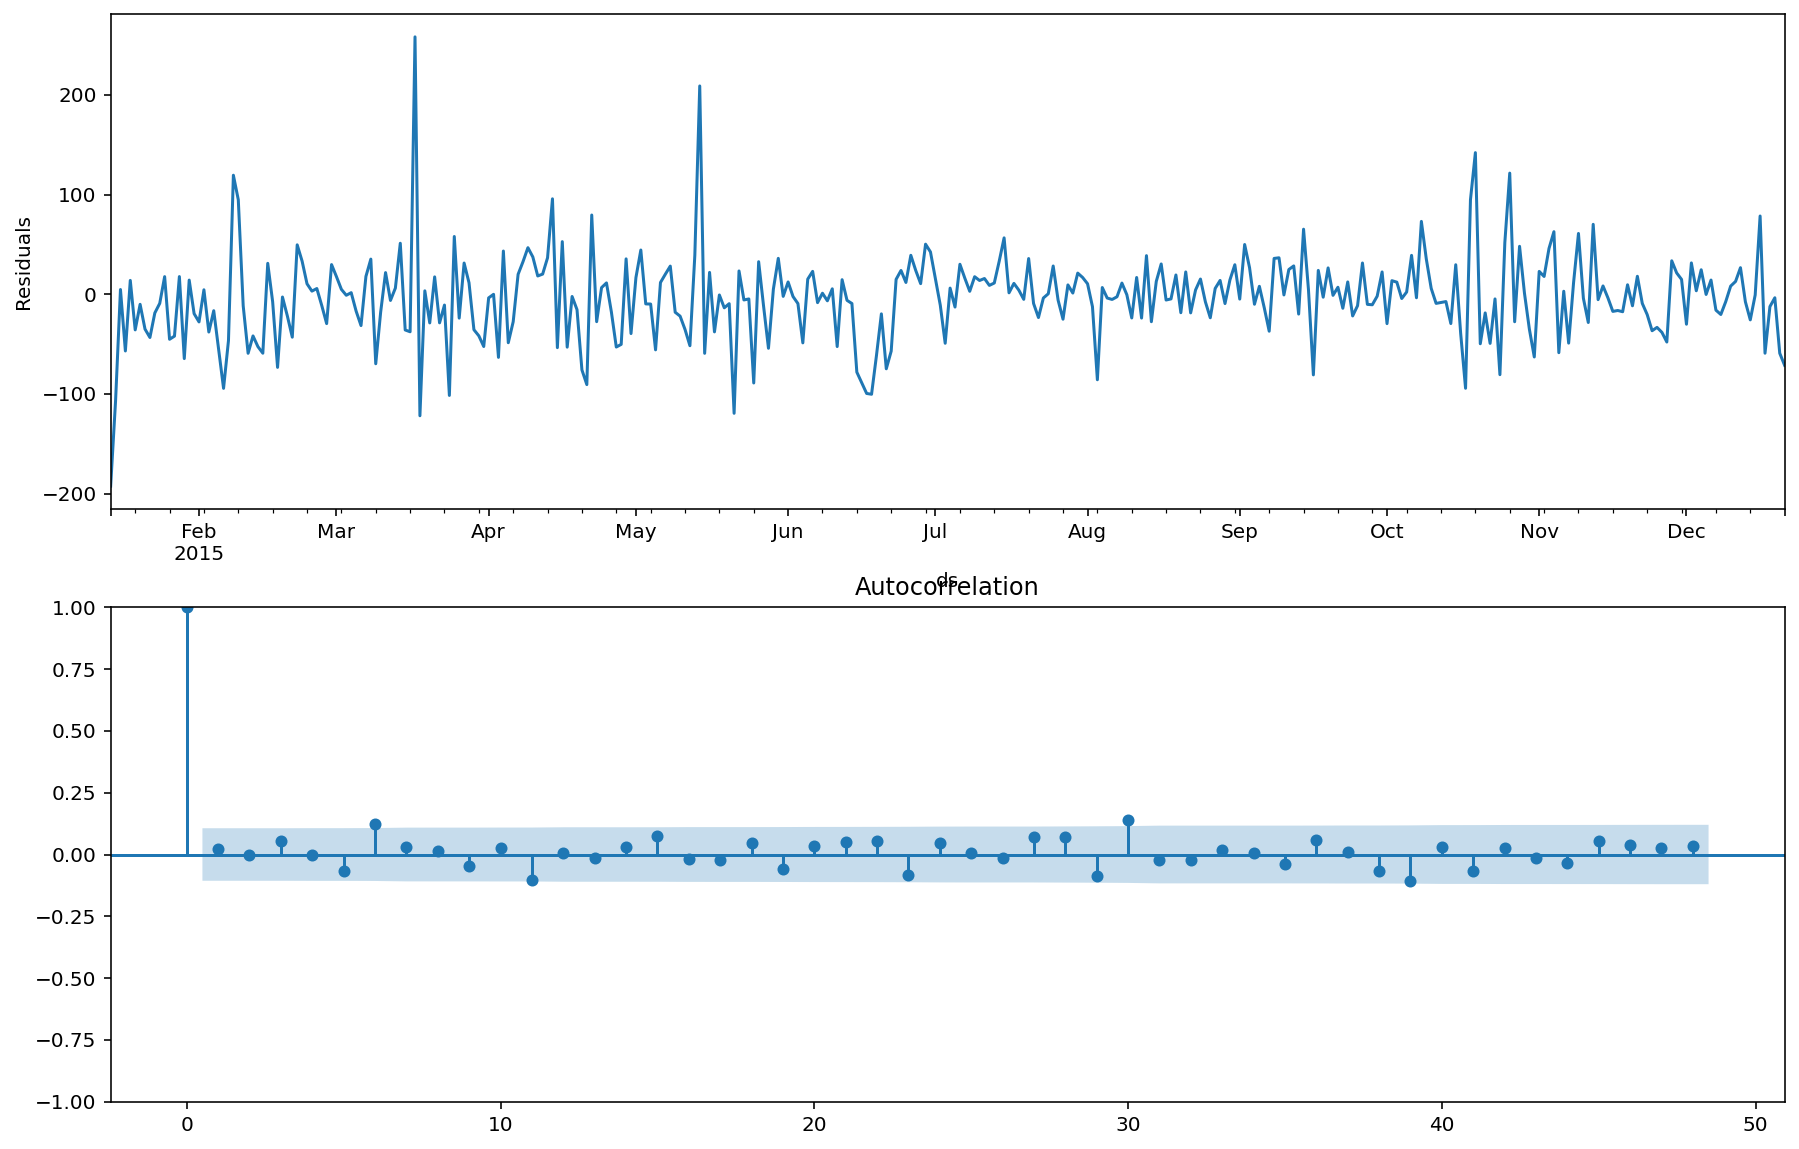

In [33]:
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u"Residuals")

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Student's test: p=%f" % stats.ttest_1samp(best_model.resid[13:], 0)[1])
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

In [34]:
def invboxcox(y, lmbda):
    # reverse Box Cox transformation
    if lmbda == 0:
        return np.exp(y)
    else:
        return np.exp(np.log(lmbda * y + 1) / lmbda)

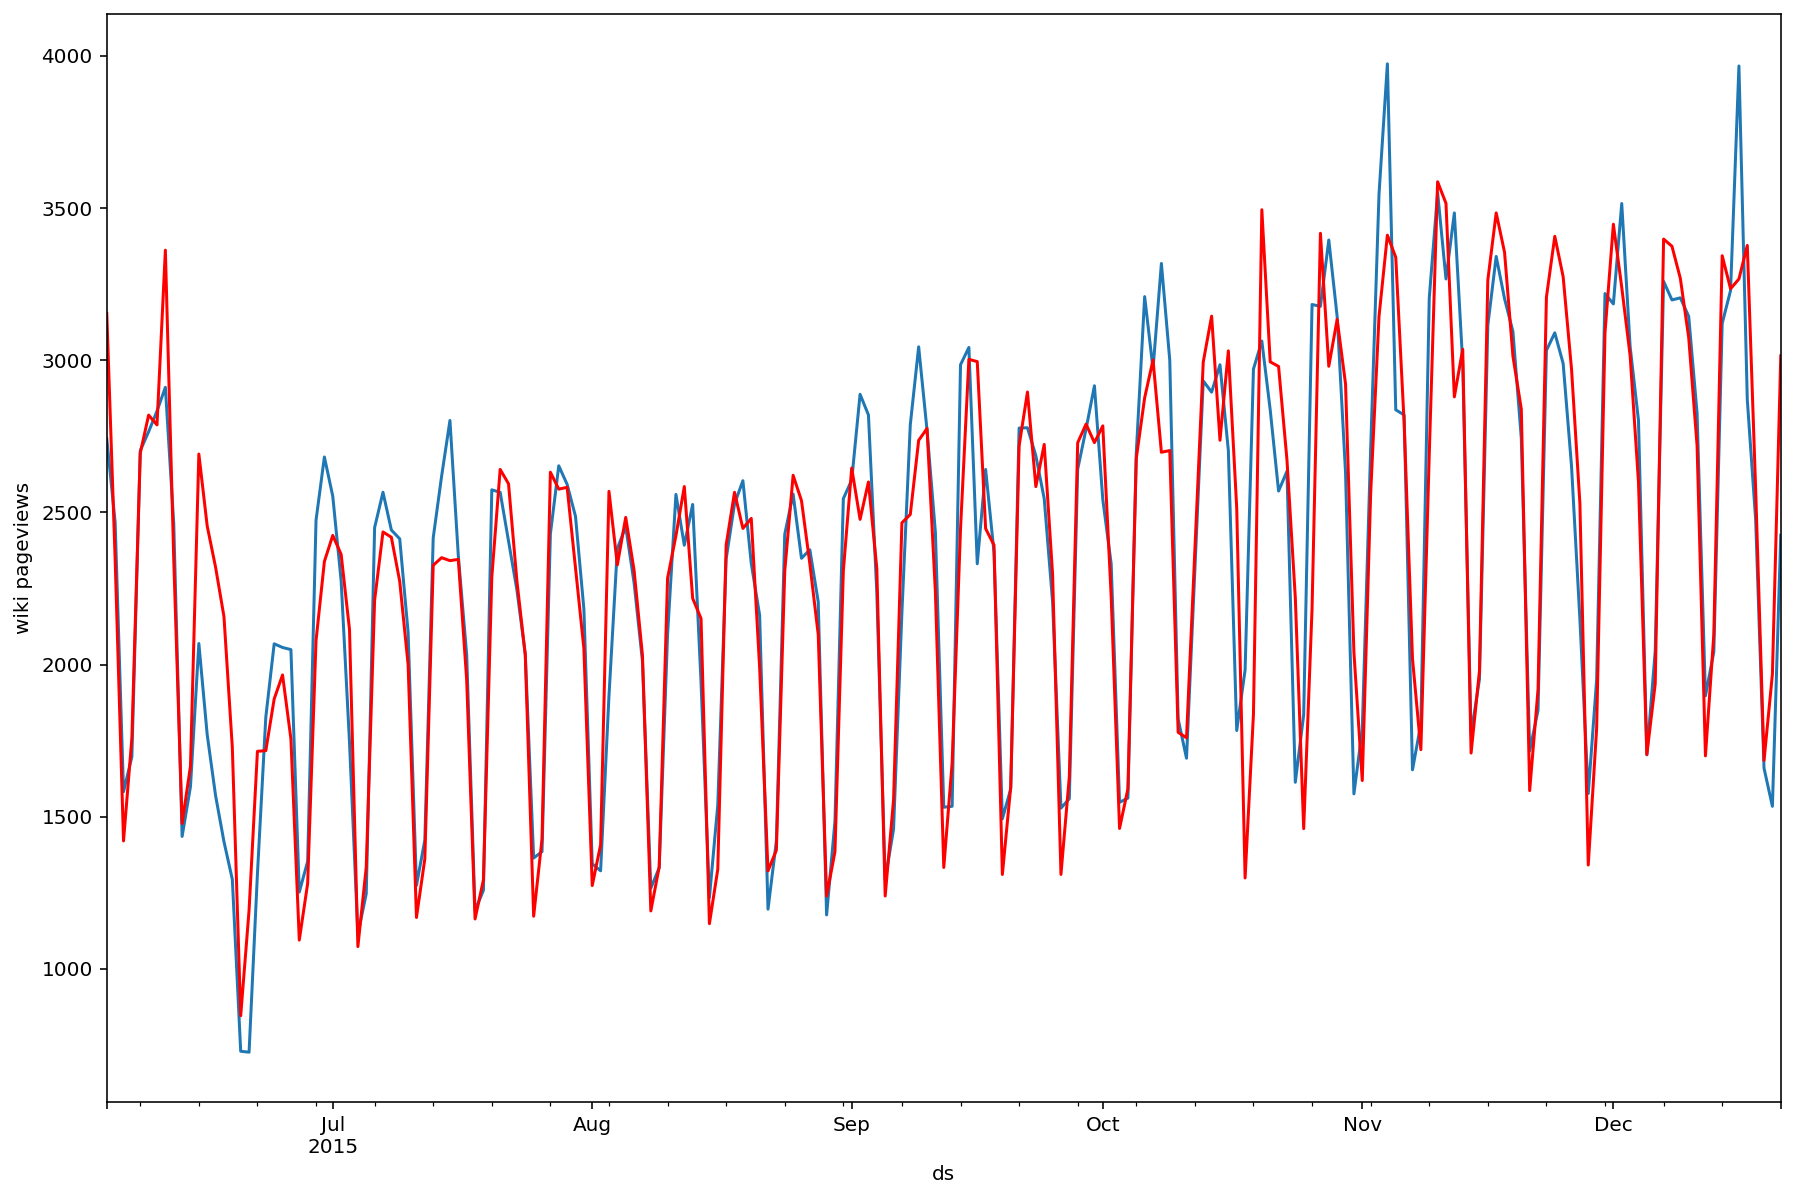

In [35]:
train_df["arima_model"] = invboxcox(best_model.fittedvalues, lmbda)

train_df.y.tail(200).plot()
train_df.arima_model[13:].tail(200).plot(color="r")
plt.ylabel("wiki pageviews");